In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report 

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
X_test.shape , y_test.shape

((10000, 32, 32, 3), (10000, 1))

Look into the images

In [7]:
labels = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

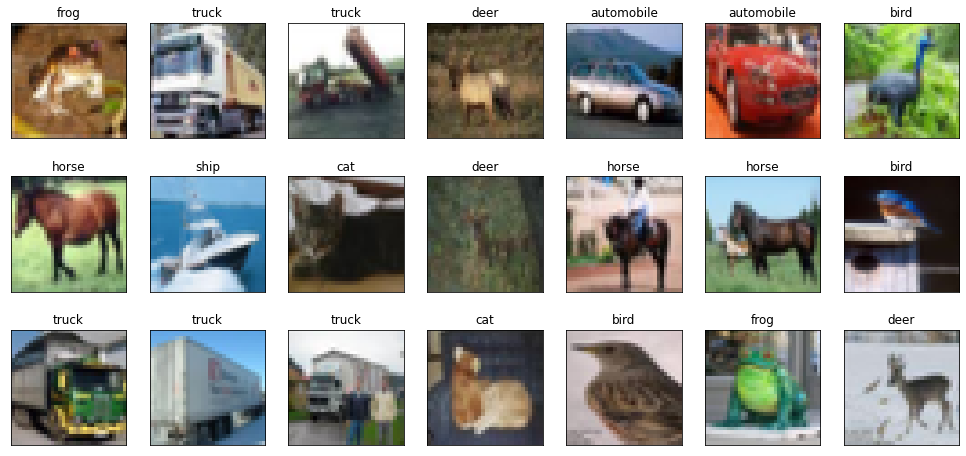

In [8]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [9]:
## no of images of each type 
pd.Series(y_train.flatten()).value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

In [10]:
## no of images of each type 
pd.Series(y_test.flatten()).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

It's balanced data.  

In [7]:
seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
## hot encode the target . 
y_train_coded = tf.keras.utils.to_categorical(y_train)
y_test_coded = tf.keras.utils.to_categorical(y_test)
print(y_train_coded.shape)
print(y_test_coded.shape)

(50000, 10)
(10000, 10)


In [8]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\n Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [9]:
## monitor the validation loss 
from tensorflow.keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 
  

In [10]:
## Normalizing 
X_train_normalised = X_train/255
X_test_normalised = X_test/255
print(X_train_normalised[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [22]:
y_train_coded.shape , y_test_coded.shape

((50000, 10), (10000, 10))

In [23]:
X_train_normalised.shape , X_test_normalised.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 2.0679 - accuracy: 0.2486 - val_loss: 1.8548 - val_accuracy: 0.3551
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 1.8095 - accuracy: 0.3636 - val_loss: 1.7771 - val_accuracy: 0.3831
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 1.7463 - accuracy: 0.3860 - val_loss: 1.7402 - val_accuracy: 0.3858
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 1.6891 - accuracy: 0.4118 - val_loss: 1.7033 - val_accuracy: 0.4079
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 1.6549 - accuracy: 0.4216 - val_loss: 1.6783 - val_accuracy: 0.4216
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 1.6184 - accuracy: 0.4373 - val_loss: 1.6776 - val_accuracy: 0.4012
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5985 - accuracy: 0.4452 - val_loss: 1.6495 - val_accuracy: 0.4295
Epoch 

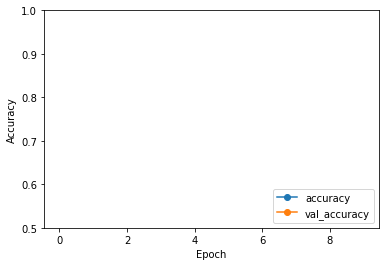

In [26]:
## With single layer , 128 neurons and w/o callback.

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train_coded

test_labels = y_test_coded

    
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
   
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=10, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 2.0549 - accuracy: 0.2565 - val_loss: 1.8468 - val_accuracy: 0.3527
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 1.8072 - accuracy: 0.3702 - val_loss: 1.7839 - val_accuracy: 0.3742
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 1.7382 - accuracy: 0.3929 - val_loss: 1.7258 - val_accuracy: 0.3933
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 1.6811 - accuracy: 0.4110 - val_loss: 1.7224 - val_accuracy: 0.3867
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.6472 - accuracy: 0.4205 - val_loss: 1.6774 - val_accuracy: 0.4215
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.6110 - accuracy: 0.4411 - val_loss: 1.6742 - val_accuracy: 0.4056
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 1.5924 - accuracy: 0.4470 - val_loss: 1.6442 - val_accuracy: 0.4317
Epoch 

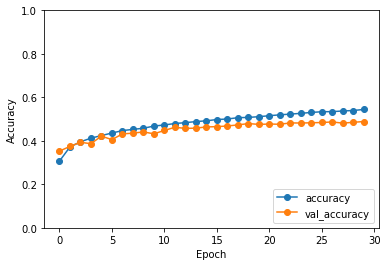

In [41]:
## With single layer and increasing epochs

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Test set Accuracy has increased a bit to 0.49.  

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 2.0502 - accuracy: 0.2575 - val_loss: 1.8321 - val_accuracy: 0.3588
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.7790 - accuracy: 0.3760 - val_loss: 1.7412 - val_accuracy: 0.3919
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.6989 - accuracy: 0.3977 - val_loss: 1.6981 - val_accuracy: 0.3985
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.6355 - accuracy: 0.4214 - val_loss: 1.6598 - val_accuracy: 0.4096
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 1.5941 - accuracy: 0.4328 - val_loss: 1.6300 - val_accuracy: 0.4271
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.5609 - accuracy: 0.4519 - val_loss: 1.6288 - val_accuracy: 0.4211
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 1.5408 - accuracy: 0.4605 - val_loss: 1.6027 - val_accuracy: 0.4432
Epoch 

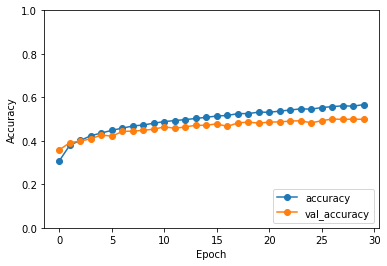

In [43]:
## With two  layers and increasing epochs

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


No change in test accuracy.  

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 2.0467 - accuracy: 0.2604 - val_loss: 1.8115 - val_accuracy: 0.3632
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.7640 - accuracy: 0.3737 - val_loss: 1.7290 - val_accuracy: 0.3858
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.6742 - accuracy: 0.4019 - val_loss: 1.6714 - val_accuracy: 0.4073
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.6148 - accuracy: 0.4312 - val_loss: 1.6311 - val_accuracy: 0.4220
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 1.5778 - accuracy: 0.4399 - val_loss: 1.6336 - val_accuracy: 0.4251
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.5433 - accuracy: 0.4541 - val_loss: 1.6026 - val_accuracy: 0.4291
Epoch 7/30
625/625 [==============================] - 4s 7ms/step - loss: 1.5181 - accuracy: 0.4660 - val_loss: 1.5917 - val_accuracy: 0.4370
Epoch 

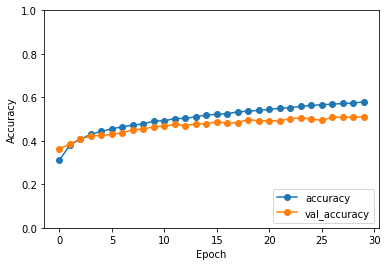

In [44]:

## With three  layers and increasing epochs

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Test set accuracy increased to 0.5.  

In [54]:
X_train_normalised.shape

(50000, 32, 32, 3)

Epoch 1/30
625/625 [==============================] - 37s 59ms/step - loss: 1.9464 - accuracy: 0.2986 - val_loss: 1.5969 - val_accuracy: 0.4477
Epoch 2/30
625/625 [==============================] - 36s 57ms/step - loss: 1.5441 - accuracy: 0.4647 - val_loss: 1.4548 - val_accuracy: 0.4986
Epoch 3/30
625/625 [==============================] - 37s 59ms/step - loss: 1.4111 - accuracy: 0.5083 - val_loss: 1.3791 - val_accuracy: 0.5239
Epoch 4/30
625/625 [==============================] - 40s 64ms/step - loss: 1.3186 - accuracy: 0.5432 - val_loss: 1.3216 - val_accuracy: 0.5422
Epoch 5/30
625/625 [==============================] - 38s 61ms/step - loss: 1.2533 - accuracy: 0.5650 - val_loss: 1.2737 - val_accuracy: 0.5596
Epoch 6/30
625/625 [==============================] - 40s 64ms/step - loss: 1.2005 - accuracy: 0.5869 - val_loss: 1.2794 - val_accuracy: 0.5498
Epoch 7/30
625/625 [==============================] - 39s 62ms/step - loss: 1.1621 - accuracy: 0.5975 - val_loss: 1.2111 - val_accuracy:

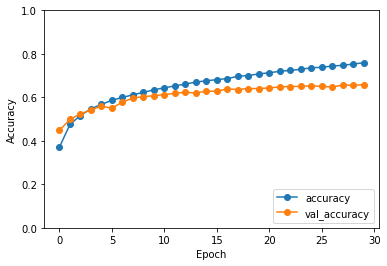

In [55]:
## Adding Convolution and MaxPooling

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Epoch 1/30
625/625 [==============================] - 66s 104ms/step - loss: 2.0705 - accuracy: 0.2503 - val_loss: 1.6334 - val_accuracy: 0.4287
Epoch 2/30
625/625 [==============================] - 74s 118ms/step - loss: 1.5792 - accuracy: 0.4397 - val_loss: 1.4737 - val_accuracy: 0.4784
Epoch 3/30
625/625 [==============================] - 79s 126ms/step - loss: 1.4346 - accuracy: 0.4913 - val_loss: 1.3958 - val_accuracy: 0.5076
Epoch 4/30
625/625 [==============================] - 70s 112ms/step - loss: 1.3419 - accuracy: 0.5265 - val_loss: 1.3361 - val_accuracy: 0.5360
Epoch 5/30
625/625 [==============================] - 65s 104ms/step - loss: 1.2904 - accuracy: 0.5471 - val_loss: 1.2867 - val_accuracy: 0.5450
Epoch 6/30
625/625 [==============================] - 64s 103ms/step - loss: 1.2428 - accuracy: 0.5646 - val_loss: 1.2538 - val_accuracy: 0.5652
Epoch 7/30
625/625 [==============================] - 62s 100ms/step - loss: 1.2063 - accuracy: 0.5781 - val_loss: 1.2199 - val_ac

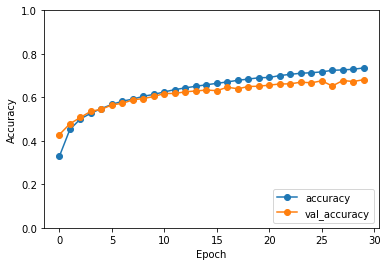

In [57]:
## Adding 2 Convolutions and MaxPooling

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Significant improvement in test set accuracy.

Epoch 1/30
625/625 [==============================] - 74s 117ms/step - loss: 2.1216 - accuracy: 0.2055 - val_loss: 1.7214 - val_accuracy: 0.3778
Epoch 2/30
625/625 [==============================] - 79s 126ms/step - loss: 1.6615 - accuracy: 0.3983 - val_loss: 1.5175 - val_accuracy: 0.4487
Epoch 3/30
625/625 [==============================] - 75s 121ms/step - loss: 1.4934 - accuracy: 0.4604 - val_loss: 1.4355 - val_accuracy: 0.4821
Epoch 4/30
625/625 [==============================] - 73s 117ms/step - loss: 1.4019 - accuracy: 0.4961 - val_loss: 1.3743 - val_accuracy: 0.5114
Epoch 5/30
625/625 [==============================] - 61s 98ms/step - loss: 1.3450 - accuracy: 0.5170 - val_loss: 1.3236 - val_accuracy: 0.5277
Epoch 6/30
625/625 [==============================] - 60s 96ms/step - loss: 1.2898 - accuracy: 0.5431 - val_loss: 1.2794 - val_accuracy: 0.5435
Epoch 7/30
625/625 [==============================] - 2212s 4s/step - loss: 1.2565 - accuracy: 0.5543 - val_loss: 1.2503 - val_accur

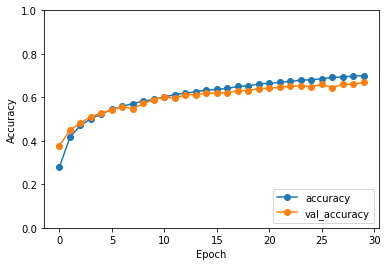

In [58]:
## Adding 3 Convolutions and MaxPooling and increasing the neurons in the layers 

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.0001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


With 3 Convolution layers , accuracy decreased slightly.  

Epoch 1/30
625/625 [==============================] - 64s 102ms/step - loss: 2.2734 - accuracy: 0.1647 - val_loss: 2.1426 - val_accuracy: 0.2852
Epoch 2/30
625/625 [==============================] - 62s 99ms/step - loss: 2.0855 - accuracy: 0.2928 - val_loss: 1.9384 - val_accuracy: 0.3277
Epoch 3/30
625/625 [==============================] - 83s 132ms/step - loss: 1.9058 - accuracy: 0.3371 - val_loss: 1.8352 - val_accuracy: 0.3607
Epoch 4/30
625/625 [==============================] - 78s 125ms/step - loss: 1.8100 - accuracy: 0.3672 - val_loss: 1.7761 - val_accuracy: 0.3793
Epoch 5/30
625/625 [==============================] - 79s 126ms/step - loss: 1.7581 - accuracy: 0.3871 - val_loss: 1.7310 - val_accuracy: 0.3923
Epoch 6/30
625/625 [==============================] - 73s 118ms/step - loss: 1.7132 - accuracy: 0.4010 - val_loss: 1.6966 - val_accuracy: 0.4065
Epoch 7/30
625/625 [==============================] - 72s 115ms/step - loss: 1.6801 - accuracy: 0.4127 - val_loss: 1.6669 - val_acc

625/625 [==============================] - 53s 85ms/step - loss: 2.3106 - accuracy: 0.1013 - val_loss: 2.3133 - val_accuracy: 0.0980
Epoch 21/30
625/625 [==============================] - 52s 84ms/step - loss: 2.3128 - accuracy: 0.0979 - val_loss: 2.3049 - val_accuracy: 0.1003
Epoch 22/30
625/625 [==============================] - 53s 85ms/step - loss: 2.3125 - accuracy: 0.0998 - val_loss: 2.3132 - val_accuracy: 0.0980
Epoch 23/30
625/625 [==============================] - 54s 87ms/step - loss: 2.3116 - accuracy: 0.0999 - val_loss: 2.3115 - val_accuracy: 0.1014
Epoch 24/30
625/625 [==============================] - 195s 313ms/step - loss: 2.3119 - accuracy: 0.1020 - val_loss: 2.3197 - val_accuracy: 0.1014
Epoch 25/30
625/625 [==============================] - 52s 83ms/step - loss: 2.3130 - accuracy: 0.0981 - val_loss: 2.3167 - val_accuracy: 0.1016
Epoch 26/30
625/625 [==============================] - 55s 88ms/step - loss: 2.3115 - accuracy: 0.0971 - val_loss: 2.3065 - val_accuracy: 0.

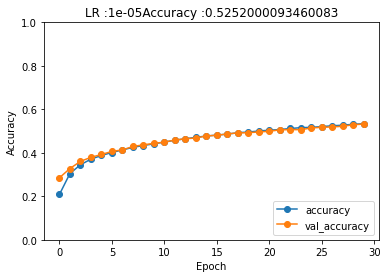

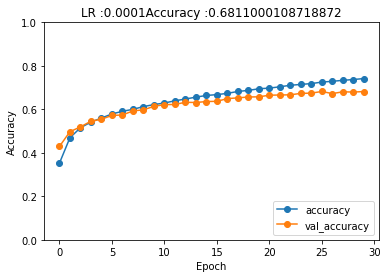

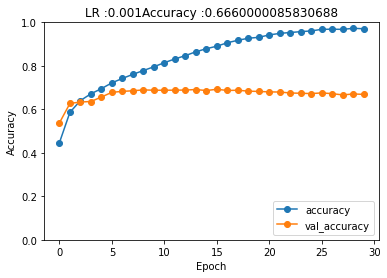

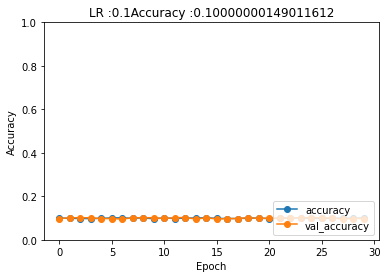

In [59]:
## Change the learning rate and check for accuracy 
## Adding 2 Convolutions and MaxPooling

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

for lr in [0.00001, 0.0001, 0.001, 0.1]:
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    optim = tf.keras.optimizers.Adam(learning_rate= lr)
    
    model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
    test_loss, test_acc = model.evaluate(test_images,test_labels)
    print("Test set image accuracy :{}".format(test_acc))
    ##
    plt.figure()
    plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
    plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title("LR :" + str(lr) + "Accuracy :" + str(test_acc))


For the two CNN layer model , learning rate of 0.0001 has given the best test set accuracy of 0.68.  

Epoch 1/30
625/625 [==============================] - 56s 87ms/step - loss: 1.7927 - accuracy: 0.3393 - val_loss: 1.2818 - val_accuracy: 0.5465
Epoch 2/30
625/625 [==============================] - 59s 94ms/step - loss: 1.2562 - accuracy: 0.5561 - val_loss: 1.0834 - val_accuracy: 0.6229
Epoch 3/30
625/625 [==============================] - 61s 97ms/step - loss: 1.0869 - accuracy: 0.6192 - val_loss: 1.0190 - val_accuracy: 0.6402
Epoch 4/30
625/625 [==============================] - 62s 99ms/step - loss: 0.9855 - accuracy: 0.6552 - val_loss: 0.9972 - val_accuracy: 0.6560
Epoch 5/30
625/625 [==============================] - 62s 99ms/step - loss: 0.9100 - accuracy: 0.6797 - val_loss: 0.9678 - val_accuracy: 0.6622
Epoch 6/30
625/625 [==============================] - 62s 99ms/step - loss: 0.8427 - accuracy: 0.7018 - val_loss: 0.9134 - val_accuracy: 0.6801
Epoch 7/30
625/625 [==============================] - 61s 98ms/step - loss: 0.7922 - accuracy: 0.7221 - val_loss: 0.8845 - val_accuracy:

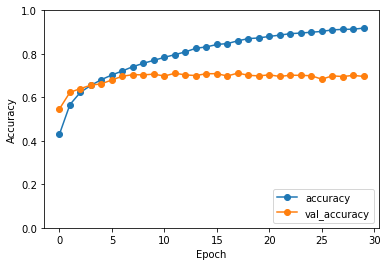

In [63]:
## Using Dropout layer and Callback with learning rate of 0.001 

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [callbacks])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


No improvement in the accuracy with drop out layer.  

In [65]:
## Confusion matrix 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##
print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1000
           1       0.87      0.74      0.80      1000
           2       0.54      0.63      0.58      1000
           3       0.50      0.44      0.47      1000
           4       0.64      0.59      0.61      1000
           5       0.56      0.64      0.60      1000
           6       0.75      0.78      0.76      1000
           7       0.76      0.75      0.75      1000
           8       0.78      0.82      0.80      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000




Epoch 1/30
625/625 [==============================] - 56s 89ms/step - loss: 1.9577 - accuracy: 0.2596 - val_loss: 1.3466 - val_accuracy: 0.5133
Epoch 2/30
625/625 [==============================] - 62s 99ms/step - loss: 1.3787 - accuracy: 0.5079 - val_loss: 1.1454 - val_accuracy: 0.5939
Epoch 3/30
625/625 [==============================] - 64s 102ms/step - loss: 1.1916 - accuracy: 0.5749 - val_loss: 1.1033 - val_accuracy: 0.6125
Epoch 4/30
625/625 [==============================] - 64s 102ms/step - loss: 1.0740 - accuracy: 0.6209 - val_loss: 1.0577 - val_accuracy: 0.6293
Epoch 5/30
625/625 [==============================] - 64s 102ms/step - loss: 1.0027 - accuracy: 0.6480 - val_loss: 0.9827 - val_accuracy: 0.6600
Epoch 6/30
625/625 [==============================] - 63s 101ms/step - loss: 0.9407 - accuracy: 0.6725 - val_loss: 0.9766 - val_accuracy: 0.6572
Epoch 7/30
625/625 [==============================] - 63s 100ms/step - loss: 0.8803 - accuracy: 0.6984 - val_loss: 0.9646 - val_accu

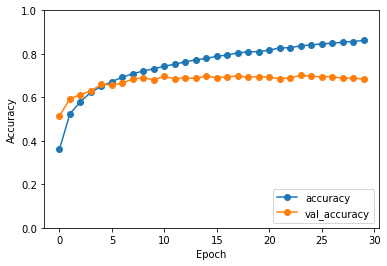

In [66]:
## Adding more hidden layers to the 2 layers CNN  model

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [callbacks])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


The extra layers have not improved the accuracy.  

Epoch 1/30
625/625 [==============================] - 60s 95ms/step - loss: 1.8212 - accuracy: 0.3295 - val_loss: 1.3319 - val_accuracy: 0.5272
Epoch 2/30
625/625 [==============================] - 60s 96ms/step - loss: 1.2721 - accuracy: 0.5505 - val_loss: 1.1031 - val_accuracy: 0.6142
Epoch 3/30
625/625 [==============================] - 64s 102ms/step - loss: 1.0955 - accuracy: 0.6133 - val_loss: 1.0422 - val_accuracy: 0.6348
Epoch 4/30
625/625 [==============================] - 69s 110ms/step - loss: 1.0028 - accuracy: 0.6483 - val_loss: 1.0062 - val_accuracy: 0.6547
Epoch 5/30
625/625 [==============================] - 67s 107ms/step - loss: 0.9339 - accuracy: 0.6685 - val_loss: 0.9363 - val_accuracy: 0.6745
Epoch 6/30
625/625 [==============================] - 62s 99ms/step - loss: 0.8505 - accuracy: 0.6992 - val_loss: 0.9998 - val_accuracy: 0.6538
Epoch 7/30
625/625 [==============================] - 68s 108ms/step - loss: 0.8107 - accuracy: 0.7142 - val_loss: 0.8866 - val_accur

Epoch 21/30
625/625 [==============================] - 61s 98ms/step - loss: 1.0541 - accuracy: 0.6200 - val_loss: 0.9049 - val_accuracy: 0.6887
Epoch 22/30
625/625 [==============================] - 73s 116ms/step - loss: 1.0322 - accuracy: 0.6270 - val_loss: 0.9233 - val_accuracy: 0.6840
Epoch 23/30
625/625 [==============================] - 69s 110ms/step - loss: 1.0141 - accuracy: 0.6317 - val_loss: 0.9118 - val_accuracy: 0.6825
Epoch 24/30
625/625 [==============================] - 71s 114ms/step - loss: 1.0135 - accuracy: 0.6315 - val_loss: 0.9086 - val_accuracy: 0.6900
Epoch 25/30
625/625 [==============================] - 66s 106ms/step - loss: 0.9971 - accuracy: 0.6380 - val_loss: 0.9458 - val_accuracy: 0.6763
Epoch 26/30
625/625 [==============================] - 73s 117ms/step - loss: 0.9793 - accuracy: 0.6450 - val_loss: 0.9039 - val_accuracy: 0.6974
Epoch 27/30
625/625 [==============================] - 68s 108ms/step - loss: 0.9738 - accuracy: 0.6434 - val_loss: 0.9051 - 

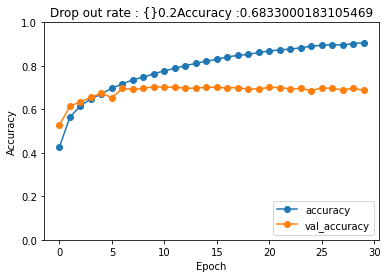

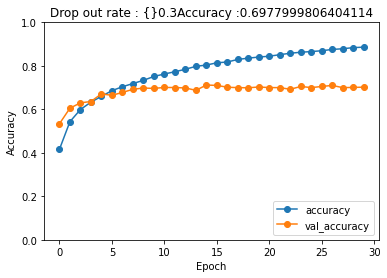

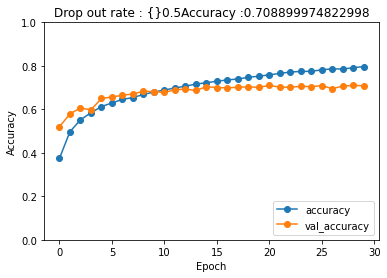

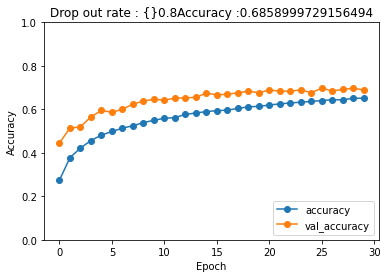

In [67]:
## Vary the drop out rate and check for accuracy

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

for rate in [0.2, 0.3,0.5,0.8]:
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(rate),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
    model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [callbacks])
    ##
    test_loss, test_acc = model.evaluate(test_images,test_labels)
    print("Test set image accuracy :{}".format(test_acc))
    ##
    plt.figure()
    plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
    plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title("Drop out rate : {}" + str(rate) + "Accuracy :" + str(test_acc))


Drop rate of 0.5 has improved the accuracy by 2%.  

Epoch 1/30
625/625 [==============================] - 68s 107ms/step - loss: 1.9115 - accuracy: 0.2937 - val_loss: 1.4078 - val_accuracy: 0.5020
Epoch 2/30
625/625 [==============================] - 60s 97ms/step - loss: 1.4535 - accuracy: 0.4771 - val_loss: 1.2456 - val_accuracy: 0.5616
Epoch 3/30
625/625 [==============================] - 62s 99ms/step - loss: 1.3036 - accuracy: 0.5362 - val_loss: 1.1411 - val_accuracy: 0.6035
Epoch 4/30
625/625 [==============================] - 68s 108ms/step - loss: 1.1832 - accuracy: 0.5790 - val_loss: 1.0986 - val_accuracy: 0.6218
Epoch 5/30
625/625 [==============================] - 59s 95ms/step - loss: 1.1276 - accuracy: 0.6000 - val_loss: 1.0396 - val_accuracy: 0.6314
Epoch 6/30
625/625 [==============================] - 57s 90ms/step - loss: 1.0469 - accuracy: 0.6265 - val_loss: 0.9710 - val_accuracy: 0.6584
Epoch 7/30
625/625 [==============================] - 56s 90ms/step - loss: 1.0032 - accuracy: 0.6453 - val_loss: 0.9581 - val_accurac

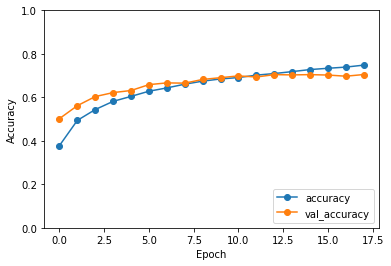

In [27]:
## Using drop rate of 0.5 and adding early stopping

training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [30]:
## get the probability 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##
print(predictions.shape)
print(predictions[0])
print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

(10000, 10)
[0.08861145 0.08834625 0.08928947 0.1760501  0.08857722 0.10344525
 0.08981362 0.08847508 0.09888937 0.08850213]
Classification report :
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1000
           1       0.86      0.80      0.83      1000
           2       0.61      0.55      0.58      1000
           3       0.51      0.52      0.52      1000
           4       0.67      0.61      0.64      1000
           5       0.57      0.65      0.61      1000
           6       0.74      0.81      0.78      1000
           7       0.78      0.74      0.76      1000
           8       0.77      0.85      0.81      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000




Epoch 1/30
625/625 [==============================] - 75s 117ms/step - loss: 1.9992 - accuracy: 0.2534 - val_loss: 1.4384 - val_accuracy: 0.5012
Epoch 2/30
625/625 [==============================] - 71s 114ms/step - loss: 1.5169 - accuracy: 0.4512 - val_loss: 1.3039 - val_accuracy: 0.5504
Epoch 3/30
625/625 [==============================] - 71s 114ms/step - loss: 1.3991 - accuracy: 0.4914 - val_loss: 1.2325 - val_accuracy: 0.5667
Epoch 4/30
625/625 [==============================] - 74s 119ms/step - loss: 1.3225 - accuracy: 0.5297 - val_loss: 1.1948 - val_accuracy: 0.6012
Epoch 5/30
625/625 [==============================] - 72s 116ms/step - loss: 1.2756 - accuracy: 0.5478 - val_loss: 1.0906 - val_accuracy: 0.6248
Epoch 6/30
625/625 [==============================] - 73s 116ms/step - loss: 1.2350 - accuracy: 0.5597 - val_loss: 1.1060 - val_accuracy: 0.6173
Epoch 7/30
625/625 [==============================] - 72s 115ms/step - loss: 1.2146 - accuracy: 0.5670 - val_loss: 1.0650 - val_ac

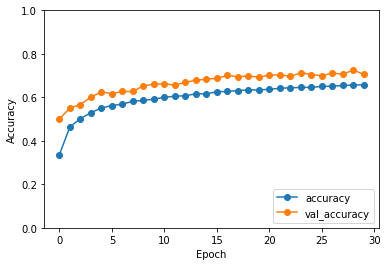

In [71]:
## Add additional dropout layers.
training_images= X_train_normalised
test_images = X_test_normalised
##
training_labels = y_train
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Adding additional drop out layers didn't help.Also the training accuracy is very poor.  

Epoch 1/30
625/625 [==============================] - 57s 91ms/step - loss: 2.0196 - accuracy: 0.2787 - val_loss: 1.4593 - val_accuracy: 0.5035
Epoch 2/30
625/625 [==============================] - 61s 98ms/step - loss: 1.5110 - accuracy: 0.4800 - val_loss: 1.3016 - val_accuracy: 0.5735
Epoch 3/30
625/625 [==============================] - 60s 96ms/step - loss: 1.3886 - accuracy: 0.5318 - val_loss: 1.2321 - val_accuracy: 0.5996
Epoch 4/30
625/625 [==============================] - 64s 102ms/step - loss: 1.3092 - accuracy: 0.5703 - val_loss: 1.2435 - val_accuracy: 0.6029
Epoch 5/30
625/625 [==============================] - 65s 104ms/step - loss: 1.2606 - accuracy: 0.5909 - val_loss: 1.1369 - val_accuracy: 0.6411
Epoch 6/30
625/625 [==============================] - 68s 108ms/step - loss: 1.2112 - accuracy: 0.6062 - val_loss: 1.1293 - val_accuracy: 0.6474
Epoch 7/30
625/625 [==============================] - 57s 91ms/step - loss: 1.1797 - accuracy: 0.6228 - val_loss: 1.1041 - val_accura

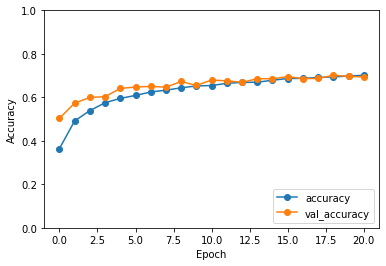

In [72]:
## Adding regularization 
training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu,kernel_regularizer= tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Epoch 1/30
625/625 [==============================] - 55s 88ms/step - loss: 2.0586 - accuracy: 0.3268 - val_loss: 1.4546 - val_accuracy: 0.5299
Epoch 2/30
625/625 [==============================] - 59s 95ms/step - loss: 1.4384 - accuracy: 0.5315 - val_loss: 1.2668 - val_accuracy: 0.6110
Epoch 3/30
625/625 [==============================] - 63s 101ms/step - loss: 1.3122 - accuracy: 0.5890 - val_loss: 1.2333 - val_accuracy: 0.6194
Epoch 4/30
625/625 [==============================] - 59s 95ms/step - loss: 1.2530 - accuracy: 0.6145 - val_loss: 1.2487 - val_accuracy: 0.6231
Epoch 5/30
625/625 [==============================] - 60s 95ms/step - loss: 1.2138 - accuracy: 0.6384 - val_loss: 1.1805 - val_accuracy: 0.6446
Epoch 6/30
625/625 [==============================] - 55s 89ms/step - loss: 1.1666 - accuracy: 0.6515 - val_loss: 1.1524 - val_accuracy: 0.6613
Epoch 7/30
625/625 [==============================] - 57s 90ms/step - loss: 1.1380 - accuracy: 0.6675 - val_loss: 1.1470 - val_accuracy

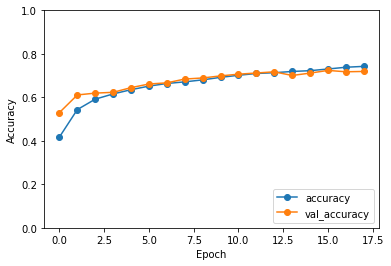

In [73]:
## Increasing the neurons 
training_images= X_train_normalised
#val_images= val_dataset['data']
test_images = X_test_normalised
##
training_labels = y_train
#val_labels = val_dataset['target']
test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation=tf.nn.relu,kernel_regularizer= tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Epoch 1/30
625/625 [==============================] - 93s 147ms/step - loss: 1.9149 - accuracy: 0.2859 - val_loss: 1.3750 - val_accuracy: 0.5121
Epoch 2/30
625/625 [==============================] - 99s 158ms/step - loss: 1.3861 - accuracy: 0.5051 - val_loss: 1.1327 - val_accuracy: 0.5996
Epoch 3/30
625/625 [==============================] - 103s 164ms/step - loss: 1.1872 - accuracy: 0.5811 - val_loss: 1.0232 - val_accuracy: 0.6344
Epoch 4/30
625/625 [==============================] - 106s 170ms/step - loss: 1.0523 - accuracy: 0.6283 - val_loss: 0.9580 - val_accuracy: 0.6622
Epoch 5/30
625/625 [==============================] - 100s 160ms/step - loss: 0.9570 - accuracy: 0.6646 - val_loss: 0.8966 - val_accuracy: 0.6819
Epoch 6/30
625/625 [==============================] - 95s 152ms/step - loss: 0.8922 - accuracy: 0.6890 - val_loss: 0.8565 - val_accuracy: 0.6969
Epoch 7/30
625/625 [==============================] - 91s 146ms/step - loss: 0.8288 - accuracy: 0.7128 - val_loss: 0.8468 - val

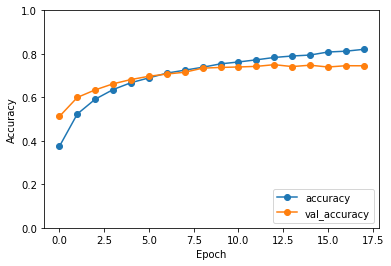

In [32]:
## 2 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [33]:
## get the probability 
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##

print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1000
           1       0.89      0.84      0.87      1000
           2       0.68      0.58      0.63      1000
           3       0.56      0.57      0.56      1000
           4       0.70      0.70      0.70      1000
           5       0.64      0.65      0.64      1000
           6       0.80      0.81      0.80      1000
           7       0.77      0.78      0.78      1000
           8       0.86      0.83      0.84      1000
           9       0.80      0.88      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000




Epoch 1/30
625/625 [==============================] - 117s 186ms/step - loss: 2.0006 - accuracy: 0.2358 - val_loss: 1.4971 - val_accuracy: 0.4593
Epoch 2/30
625/625 [==============================] - 121s 194ms/step - loss: 1.4043 - accuracy: 0.4963 - val_loss: 1.1217 - val_accuracy: 0.5960
Epoch 3/30
625/625 [==============================] - 127s 203ms/step - loss: 1.1638 - accuracy: 0.5890 - val_loss: 1.0038 - val_accuracy: 0.6403
Epoch 4/30
625/625 [==============================] - 125s 199ms/step - loss: 1.0183 - accuracy: 0.6425 - val_loss: 0.9592 - val_accuracy: 0.6652
Epoch 5/30
625/625 [==============================] - 132s 211ms/step - loss: 0.8898 - accuracy: 0.6946 - val_loss: 0.8760 - val_accuracy: 0.6939
Epoch 6/30
625/625 [==============================] - 116s 186ms/step - loss: 0.7880 - accuracy: 0.7306 - val_loss: 0.8875 - val_accuracy: 0.6920
Epoch 7/30
625/625 [==============================] - 299s 479ms/step - loss: 0.7177 - accuracy: 0.7550 - val_loss: 0.7729 -

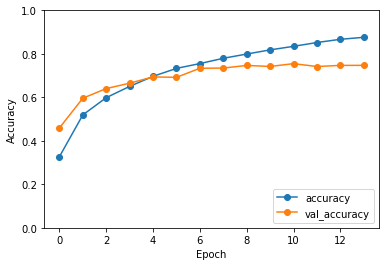

In [35]:
## 3 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [36]:
## get the probability 

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##

print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1000
           1       0.89      0.86      0.87      1000
           2       0.72      0.56      0.63      1000
           3       0.56      0.58      0.57      1000
           4       0.72      0.71      0.71      1000
           5       0.66      0.63      0.65      1000
           6       0.80      0.84      0.82      1000
           7       0.79      0.77      0.78      1000
           8       0.82      0.85      0.84      1000
           9       0.86      0.82      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000




Epoch 1/30
625/625 [==============================] - 126s 198ms/step - loss: 1.9715 - accuracy: 0.2548 - val_loss: 1.3705 - val_accuracy: 0.5029
Epoch 2/30
625/625 [==============================] - 124s 198ms/step - loss: 1.3298 - accuracy: 0.5184 - val_loss: 1.0997 - val_accuracy: 0.6114
Epoch 3/30
625/625 [==============================] - 119s 191ms/step - loss: 1.1233 - accuracy: 0.5973 - val_loss: 1.0410 - val_accuracy: 0.6284
Epoch 4/30
625/625 [==============================] - 964s 2s/step - loss: 0.9924 - accuracy: 0.6492 - val_loss: 0.9538 - val_accuracy: 0.6674
Epoch 5/30
625/625 [==============================] - 132s 211ms/step - loss: 0.8977 - accuracy: 0.6859 - val_loss: 0.8153 - val_accuracy: 0.7118
Epoch 6/30
625/625 [==============================] - 4722s 8s/step - loss: 0.8075 - accuracy: 0.7178 - val_loss: 0.7928 - val_accuracy: 0.7200
Epoch 7/30
625/625 [==============================] - 121s 194ms/step - loss: 0.7566 - accuracy: 0.7370 - val_loss: 0.7622 - val_

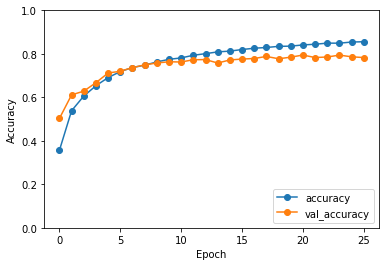

In [37]:
## 3 VGG network with Dropout.
## 3 VGG Blocks

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Test set accuracy has increased to 0.78.  

Epoch 1/30
625/625 [==============================] - 113s 179ms/step - loss: 2.0714 - accuracy: 0.1994 - val_loss: 1.4981 - val_accuracy: 0.4519
Epoch 2/30
625/625 [==============================] - 166s 266ms/step - loss: 1.5306 - accuracy: 0.4387 - val_loss: 1.2249 - val_accuracy: 0.5584
Epoch 3/30
625/625 [==============================] - 122s 195ms/step - loss: 1.3100 - accuracy: 0.5302 - val_loss: 1.1322 - val_accuracy: 0.5952
Epoch 4/30
625/625 [==============================] - 167s 267ms/step - loss: 1.1834 - accuracy: 0.5787 - val_loss: 1.0154 - val_accuracy: 0.6420
Epoch 5/30
625/625 [==============================] - 206s 330ms/step - loss: 1.0991 - accuracy: 0.6176 - val_loss: 0.9567 - val_accuracy: 0.6560
Epoch 6/30
625/625 [==============================] - 219s 350ms/step - loss: 1.0317 - accuracy: 0.6372 - val_loss: 0.8997 - val_accuracy: 0.6787
Epoch 7/30
625/625 [==============================] - 125s 199ms/step - loss: 0.9682 - accuracy: 0.6642 - val_loss: 0.9419 -

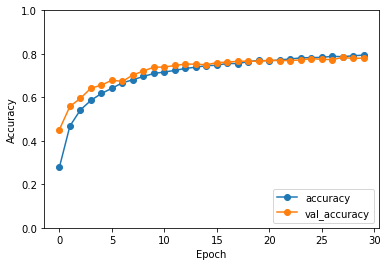

In [38]:
## 3 VGG network with varying Dropout rate.
## 3 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Varying the drop rate has not increased the test set accuracy.  

Epoch 1/30
625/625 [==============================] - 120s 190ms/step - loss: 2.0477 - accuracy: 0.2056 - val_loss: 1.5476 - val_accuracy: 0.4348
Epoch 2/30
625/625 [==============================] - 126s 201ms/step - loss: 1.5198 - accuracy: 0.4435 - val_loss: 1.2336 - val_accuracy: 0.5556
Epoch 3/30
625/625 [==============================] - 122s 195ms/step - loss: 1.3026 - accuracy: 0.5335 - val_loss: 1.1617 - val_accuracy: 0.5835
Epoch 4/30
625/625 [==============================] - 122s 195ms/step - loss: 1.1770 - accuracy: 0.5819 - val_loss: 1.0281 - val_accuracy: 0.6354
Epoch 5/30
625/625 [==============================] - 121s 193ms/step - loss: 1.0850 - accuracy: 0.6203 - val_loss: 0.9204 - val_accuracy: 0.6707
Epoch 6/30
625/625 [==============================] - 121s 194ms/step - loss: 0.9984 - accuracy: 0.6511 - val_loss: 0.9128 - val_accuracy: 0.6810
Epoch 7/30
625/625 [==============================] - 2775s 4s/step - loss: 0.9535 - accuracy: 0.6684 - val_loss: 0.8110 - v

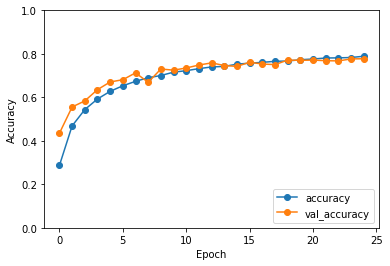

In [39]:
## 3 VGG network with varying Dropout rate and earlystopping
## 3 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Varying the dropout rate with early stopping didnt help in improving the accuracy.  

Epoch 1/30
625/625 [==============================] - 113s 180ms/step - loss: 2.3037 - accuracy: 0.1048 - val_loss: 2.2981 - val_accuracy: 0.1574
Epoch 2/30
625/625 [==============================] - 124s 199ms/step - loss: 2.2860 - accuracy: 0.1391 - val_loss: 2.1332 - val_accuracy: 0.1850
Epoch 3/30
625/625 [==============================] - 120s 192ms/step - loss: 2.1413 - accuracy: 0.1825 - val_loss: 2.0751 - val_accuracy: 0.1993
Epoch 4/30
625/625 [==============================] - 124s 198ms/step - loss: 2.0572 - accuracy: 0.1966 - val_loss: 1.9326 - val_accuracy: 0.2469
Epoch 5/30
625/625 [==============================] - 131s 209ms/step - loss: 1.9716 - accuracy: 0.2109 - val_loss: 1.9357 - val_accuracy: 0.2433
Epoch 6/30
625/625 [==============================] - 128s 205ms/step - loss: 1.9186 - accuracy: 0.2344 - val_loss: 1.8468 - val_accuracy: 0.2810
Epoch 7/30
625/625 [==============================] - 136s 218ms/step - loss: 1.8810 - accuracy: 0.2544 - val_loss: 1.7601 -

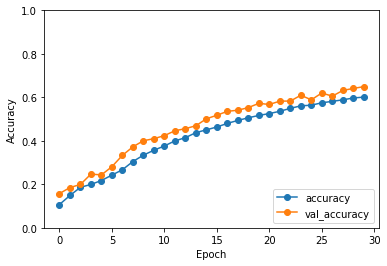

In [41]:
## 3 VGG network with varying Dropout rate and earlystopping
## SGD optimizer
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
    
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

SGD Optimiser does not improve the performance over 30 epochs. Inreasing the epochs may help.  

Epoch 1/30
625/625 [==============================] - 119s 189ms/step - loss: 2.4752 - accuracy: 0.1067 - val_loss: 2.3140 - val_accuracy: 0.0980
Epoch 2/30
625/625 [==============================] - 143s 229ms/step - loss: 2.3113 - accuracy: 0.1007 - val_loss: 2.3075 - val_accuracy: 0.0977
Epoch 3/30
625/625 [==============================] - 142s 228ms/step - loss: 2.3069 - accuracy: 0.0994 - val_loss: 2.3054 - val_accuracy: 0.0952
Epoch 4/30
625/625 [==============================] - 132s 210ms/step - loss: 2.3050 - accuracy: 0.1013 - val_loss: 2.3043 - val_accuracy: 0.0980
Epoch 5/30
625/625 [==============================] - 118s 188ms/step - loss: 2.3041 - accuracy: 0.0960 - val_loss: 2.3037 - val_accuracy: 0.0952
Epoch 6/30
625/625 [==============================] - 119s 190ms/step - loss: 2.3035 - accuracy: 0.1008 - val_loss: 2.3033 - val_accuracy: 0.0977
Epoch 7/30
625/625 [==============================] - 316s 506ms/step - loss: 2.3031 - accuracy: 0.0996 - val_loss: 2.3030 -

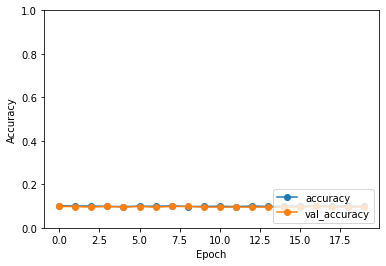

In [51]:
##Add L2 regularization 

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


Very poor perfromance with Regularization and dropout. 

Epoch 1/30
625/625 [==============================] - 149s 236ms/step - loss: 2.1382 - accuracy: 0.2487 - val_loss: 1.7379 - val_accuracy: 0.4096
Epoch 2/30
625/625 [==============================] - 147s 235ms/step - loss: 1.5904 - accuracy: 0.4604 - val_loss: 1.3892 - val_accuracy: 0.5426
Epoch 3/30
625/625 [==============================] - 132s 211ms/step - loss: 1.3782 - accuracy: 0.5524 - val_loss: 1.2683 - val_accuracy: 0.5989
Epoch 4/30
625/625 [==============================] - 129s 207ms/step - loss: 1.2817 - accuracy: 0.5920 - val_loss: 1.2263 - val_accuracy: 0.6167
Epoch 5/30
625/625 [==============================] - 131s 209ms/step - loss: 1.2183 - accuracy: 0.6242 - val_loss: 1.2533 - val_accuracy: 0.6126
Epoch 6/30
625/625 [==============================] - 151s 242ms/step - loss: 1.1548 - accuracy: 0.6482 - val_loss: 1.1438 - val_accuracy: 0.6478
Epoch 7/30
625/625 [==============================] - 136s 217ms/step - loss: 1.1055 - accuracy: 0.6715 - val_loss: 1.1076 -

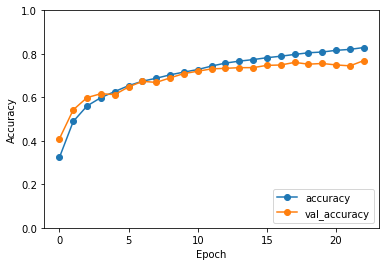

In [53]:
##Add L2 regularization 

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


L2 Regularization didnt improve the model.

Epoch 1/30
625/625 [==============================] - 114s 182ms/step - loss: 2.1432 - accuracy: 0.1695 - val_loss: 1.6436 - val_accuracy: 0.3805
Epoch 2/30
625/625 [==============================] - 610s 977ms/step - loss: 1.6471 - accuracy: 0.3813 - val_loss: 1.3818 - val_accuracy: 0.5046
Epoch 3/30
625/625 [==============================] - 134s 214ms/step - loss: 1.4453 - accuracy: 0.4747 - val_loss: 1.3450 - val_accuracy: 0.5205
Epoch 4/30
625/625 [==============================] - 130s 209ms/step - loss: 1.3406 - accuracy: 0.5213 - val_loss: 1.1656 - val_accuracy: 0.5875
Epoch 5/30
625/625 [==============================] - 122s 195ms/step - loss: 1.2659 - accuracy: 0.5488 - val_loss: 1.1173 - val_accuracy: 0.5955
Epoch 6/30
625/625 [==============================] - 163s 261ms/step - loss: 1.2198 - accuracy: 0.5684 - val_loss: 1.0585 - val_accuracy: 0.6196
Epoch 7/30
625/625 [==============================] - 132s 210ms/step - loss: 1.1829 - accuracy: 0.5840 - val_loss: 1.0289 -

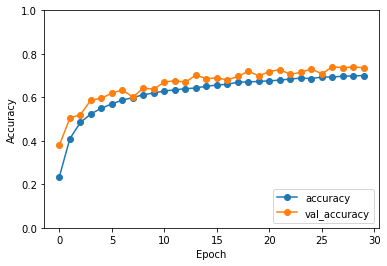

In [12]:
## 3 VGG Blocks and dropout layers with rate  of 0.5
## 3 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

By increasing the drop rate , the accuracy fell by 6%.

Epoch 1/30
625/625 [==============================] - 120s 191ms/step - loss: 1.9285 - accuracy: 0.2675 - val_loss: 1.4320 - val_accuracy: 0.4829
Epoch 2/30
625/625 [==============================] - 333s 533ms/step - loss: 1.3161 - accuracy: 0.5273 - val_loss: 1.0508 - val_accuracy: 0.6281
Epoch 3/30
625/625 [==============================] - 143s 229ms/step - loss: 1.0838 - accuracy: 0.6118 - val_loss: 0.9338 - val_accuracy: 0.6677
Epoch 4/30
625/625 [==============================] - 135s 216ms/step - loss: 0.9343 - accuracy: 0.6698 - val_loss: 0.9333 - val_accuracy: 0.6741
Epoch 5/30
625/625 [==============================] - 441s 706ms/step - loss: 0.8193 - accuracy: 0.7123 - val_loss: 0.8532 - val_accuracy: 0.6979
Epoch 6/30
625/625 [==============================] - 130s 208ms/step - loss: 0.7370 - accuracy: 0.7391 - val_loss: 0.7871 - val_accuracy: 0.7285
Epoch 7/30
625/625 [==============================] - 156s 250ms/step - loss: 0.6734 - accuracy: 0.7639 - val_loss: 0.7536 -

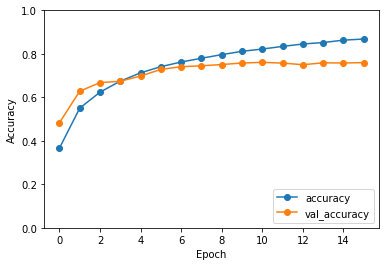

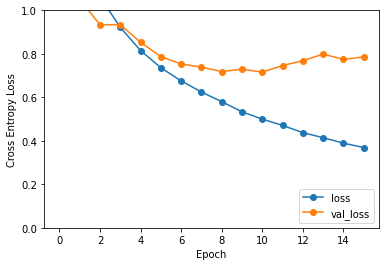

In [14]:
## Drop rate of 0.1 

## 3 VGG Blocks and dropouts of 0.1
## 3 VGG network with Dropout.
## 3 VGG Blocks
training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64, callbacks = [earlystopping])
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.figure()
plt.plot(history.history['loss'], '-o' ,label='loss')
plt.plot(history.history['val_loss'], '-o', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Reducing droprate to 0.1 didn't improve the model.  

Epoch 1/30
781/781 [==============================] - 194s 246ms/step - loss: 2.0509 - accuracy: 0.1712
Epoch 2/30
781/781 [==============================] - 372s 477ms/step - loss: 1.4776 - accuracy: 0.0969
Epoch 3/30
781/781 [==============================] - 190s 244ms/step - loss: 1.2658 - accuracy: 0.0988
Epoch 4/30
781/781 [==============================] - 188s 240ms/step - loss: 1.1498 - accuracy: 0.0979
Epoch 5/30
781/781 [==============================] - 175s 224ms/step - loss: 1.0722 - accuracy: 0.0995
Epoch 6/30
781/781 [==============================] - 183s 234ms/step - loss: 1.0319 - accuracy: 0.0983
Epoch 7/30
781/781 [==============================] - 184s 236ms/step - loss: 0.9731 - accuracy: 0.1013
Epoch 8/30
781/781 [==============================] - 192s 246ms/step - loss: 0.9208 - accuracy: 0.0993
Epoch 9/30
781/781 [==============================] - 192s 246ms/step - loss: 0.8926 - accuracy: 0.1007
Epoch 10/30
781/781 [==============================] - 179s 229m

KeyError: 'val_accuracy'

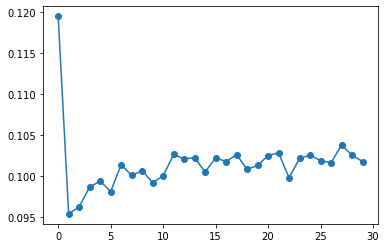

In [19]:
## Add Data Augmentation

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)   
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# create data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split = 0.2)
 # prepare iterator
it_train = datagen.flow(X_train_normalised, y_train, batch_size=64)
 # fit model
steps = int(X_train_normalised.shape[0] / 64)
%time history = model.fit(it_train, steps_per_epoch=steps, epochs= 30)
 # evaluate model
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.figure()
plt.plot(history.history['loss'], '-o' ,label='loss')
plt.plot(history.history['val_loss'], '-o', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Epoch 1/30
781/781 [==============================] - 156s 199ms/step - loss: 2.2976 - accuracy: 0.3260
Epoch 2/30
781/781 [==============================] - 252s 323ms/step - loss: 2.1315 - accuracy: 0.1878
Epoch 3/30
781/781 [==============================] - 180s 230ms/step - loss: 2.0138 - accuracy: 0.1130
Epoch 4/30
781/781 [==============================] - 171s 219ms/step - loss: 1.9043 - accuracy: 0.1195
Epoch 5/30
781/781 [==============================] - 178s 227ms/step - loss: 1.8209 - accuracy: 0.1097
Epoch 6/30
781/781 [==============================] - 156s 200ms/step - loss: 1.7450 - accuracy: 0.0973
Epoch 7/30
781/781 [==============================] - 181s 231ms/step - loss: 1.6706 - accuracy: 0.0942
Epoch 8/30
781/781 [==============================] - 157s 201ms/step - loss: 1.6109 - accuracy: 0.0943
Epoch 9/30
781/781 [==============================] - 267s 342ms/step - loss: 1.5579 - accuracy: 0.0901
Epoch 10/30
781/781 [==============================] - 194s 248m

KeyError: 'val_accuracy'

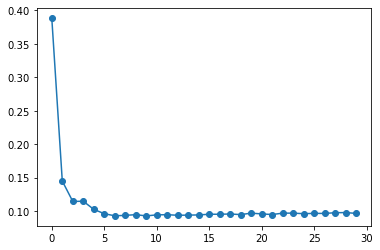

In [20]:
## Add Data Augmentation

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)   
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# create data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, validation_split = 0.2)
 # prepare iterator
it_train = datagen.flow(X_train_normalised, y_train, batch_size=64)
 # fit model
steps = int(X_train_normalised.shape[0] / 64)
%time history = model.fit(it_train, steps_per_epoch=steps, epochs= 30)
 # evaluate model
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.figure()
plt.plot(history.history['loss'], '-o' ,label='loss')
plt.plot(history.history['val_loss'], '-o', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Data Augmentation did not help improve the test set accuracy.  

Epoch 1/200
625/625 [==============================] - 154s 246ms/step - loss: 2.0024 - accuracy: 0.2359 - val_loss: 1.4073 - val_accuracy: 0.4877
Epoch 2/200
625/625 [==============================] - 152s 244ms/step - loss: 1.3544 - accuracy: 0.5074 - val_loss: 1.0620 - val_accuracy: 0.6205
Epoch 3/200
625/625 [==============================] - 123s 197ms/step - loss: 1.1252 - accuracy: 0.6001 - val_loss: 0.9786 - val_accuracy: 0.6483
Epoch 4/200
625/625 [==============================] - 120s 193ms/step - loss: 0.9876 - accuracy: 0.6479 - val_loss: 0.8926 - val_accuracy: 0.6829
Epoch 5/200
625/625 [==============================] - 119s 191ms/step - loss: 0.8962 - accuracy: 0.6855 - val_loss: 0.8447 - val_accuracy: 0.6992
Epoch 6/200
625/625 [==============================] - 119s 191ms/step - loss: 0.8263 - accuracy: 0.7100 - val_loss: 0.7812 - val_accuracy: 0.7170
Epoch 7/200
625/625 [==============================] - 120s 192ms/step - loss: 0.7658 - accuracy: 0.7293 - val_loss: 0

625/625 [==============================] - 120s 191ms/step - loss: 0.2261 - accuracy: 0.9231 - val_loss: 0.8233 - val_accuracy: 0.7953
Epoch 112/200
625/625 [==============================] - 115s 184ms/step - loss: 0.2243 - accuracy: 0.9248 - val_loss: 0.8246 - val_accuracy: 0.7923
Epoch 113/200
625/625 [==============================] - 898s 1s/step - loss: 0.2160 - accuracy: 0.9263 - val_loss: 0.8691 - val_accuracy: 0.7904
Epoch 114/200
625/625 [==============================] - 137s 220ms/step - loss: 0.2233 - accuracy: 0.9237 - val_loss: 0.8358 - val_accuracy: 0.7950
Epoch 115/200
625/625 [==============================] - 132s 211ms/step - loss: 0.2264 - accuracy: 0.9231 - val_loss: 0.8329 - val_accuracy: 0.7949
Epoch 116/200
625/625 [==============================] - 129s 206ms/step - loss: 0.2252 - accuracy: 0.9265 - val_loss: 0.8985 - val_accuracy: 0.7874
Epoch 117/200
625/625 [==============================] - 144s 230ms/step - loss: 0.2330 - accuracy: 0.9226 - val_loss: 0.84

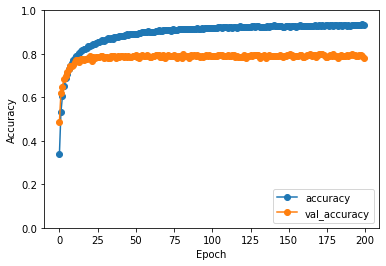

In [12]:
## 3 VGG network with Dropout rate of 0.2 and 200 epochs

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=200, validation_split = 0.2, batch_size = 64)
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Epoch 1/30
625/625 [==============================] - 140s 222ms/step - loss: 1.8862 - accuracy: 0.3533 - val_loss: 1.2435 - val_accuracy: 0.5511
Epoch 2/30
625/625 [==============================] - 146s 234ms/step - loss: 1.1908 - accuracy: 0.5765 - val_loss: 0.9847 - val_accuracy: 0.6535
Epoch 3/30
625/625 [==============================] - 146s 234ms/step - loss: 0.9597 - accuracy: 0.6601 - val_loss: 0.8631 - val_accuracy: 0.6976
Epoch 4/30
625/625 [==============================] - 150s 239ms/step - loss: 0.8264 - accuracy: 0.7100 - val_loss: 0.7391 - val_accuracy: 0.7388
Epoch 5/30
625/625 [==============================] - 152s 243ms/step - loss: 0.7277 - accuracy: 0.7501 - val_loss: 0.7682 - val_accuracy: 0.7266
Epoch 6/30
625/625 [==============================] - 167s 266ms/step - loss: 0.6586 - accuracy: 0.7704 - val_loss: 0.6659 - val_accuracy: 0.7655
Epoch 7/30
625/625 [==============================] - 174s 278ms/step - loss: 0.6014 - accuracy: 0.7916 - val_loss: 0.9945 -

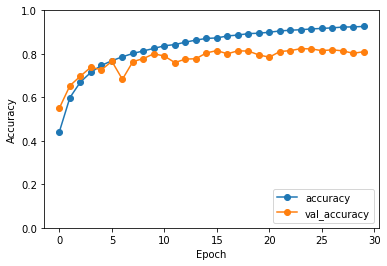

In [13]:
## Add Batch Normalisation
## 3 VGG network with Dropout rate of 0.2 and 30 epochs

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=30, validation_split = 0.2, batch_size = 64)
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Batch Normalization has improved the model accuracy by 2%.     

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Epoch 1/40
625/625 [==============================] - 156s 248ms/step - loss: 1.8838 - accuracy: 0.3154 - val_loss: 1.7838 - val_accuracy: 0.4053
Epoch 2/40
625/625 [==============================] - 186s 298ms/step - loss: 1.1892 - accuracy: 0.5814 - val_loss: 1.2242 - val_accuracy: 0.5831
Epoch 3/40
625/625 [==============================] - 155s 248ms/step - loss: 0.9477 - accuracy: 0.6747 - val_loss: 0.8503 - val_accuracy: 0.7070
Epoch 4/40
625/625 [==============================] - 159s 255ms/step - loss: 0.8243 - accuracy: 0.7162 - val_loss: 0.9028 - val_accuracy: 0.6966
Epoch 5/40
625/625 [==============================] - 160s 256ms/step - loss: 0.7229 - accuracy: 0.7526 - val_loss: 0.7546 - val_accuracy: 0.7359
Epoch 6/40
625/625 [==============================] - 152s 243ms/step - loss: 0.6641 - accuracy: 0.7735 - val_loss: 0.7919 - val_accuracy: 0.7373
Epoch 7/40
625/625 [==============================] - 158s 253ms/step - loss: 0.6059 - accuracy: 0.7941 - val_loss: 0.9799 -

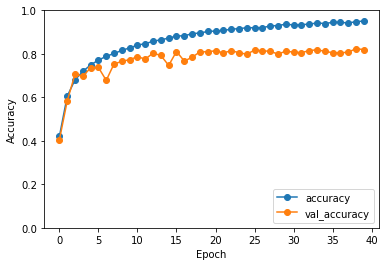

In [14]:
## 3 VGG network with Btach Normalization and with additional Dense Layers and with Dropout rate of 0.2 and 40 epochs

training_images= X_train_normalised

test_images = X_test_normalised
##
training_labels = y_train

test_labels = y_test

    
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 64, kernel_size = 3),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3, padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D( activation='relu', input_shape=(32, 32, 3), filters = 128, kernel_size = 3,padding = "same"),
    tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu ),
    tf.keras.layers.Dense(64,activation=tf.nn.relu ),
    tf.keras.layers.Dense(64,activation=tf.nn.relu ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
optim = tf.keras.optimizers.Adam(learning_rate= 0.001)
    
model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
%time history = model.fit(training_images, training_labels, epochs=40, validation_split = 0.2, batch_size = 64)
    ##
%time test_loss, test_acc = model.evaluate(test_images,test_labels)
print("Test set image accuracy :{}".format(test_acc))
##
plt.figure()
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Test set accuracy has increased to 0.82.  

In [15]:
## get the probability 

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
## based on the max value of probability , predict the class.
test_predicted_labels = []
for i in range(len(predictions)):
    pred_label = np.argmax(predictions[i])
    test_predicted_labels.append(pred_label)
##

print("Classification report :\n{}\n".format(
     classification_report(test_labels, test_predicted_labels)))

Classification report :
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.88      0.94      0.91      1000
           2       0.79      0.71      0.75      1000
           3       0.68      0.67      0.67      1000
           4       0.78      0.82      0.80      1000
           5       0.75      0.74      0.75      1000
           6       0.85      0.88      0.87      1000
           7       0.89      0.81      0.85      1000
           8       0.91      0.88      0.89      1000
           9       0.86      0.89      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000




In [ ]:
labels = ['airplane','automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Class 1 and 8  i.e Automobile and Ship images have a good f1 score  i.e less number of wrong classifications .    
Class 3 followed by Class 2 and class 5 i.e  Cat , Bird and Dog images have poor recall and precision.    

Save the model.  

In [16]:
model_name = 'cifar10_classify.h5'
model.save(model_name, save_format='h5')

In [17]:
new_model = tf.keras.models.load_model(model_name)
print(new_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)       

In [18]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

313/313 - 6s - loss: 0.7037 - accuracy: 0.8202
Restored model, accuracy: 82.02%
